In [1]:
###########################################################
#                                                         #
#                         DAT                             #
#                                                         #
#                          Fork from Oscillo_plot_CSV     #
#                          05/2019     Adrien Poindron    #
###########################################################

In [18]:
import pylab
import numpy as np
import scipy
import matplotlib

%matplotlib qt

In [130]:
from scipy.signal import decimate, periodogram, welch, windows, argrelextrema, find_peaks, savgol_filter, envelope
from scipy.constants import c
from matplotlib import cm
from scipy.optimize import curve_fit
# cm = pylab.get_cmap('jet')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ImportError: cannot import name 'envelope'

In [3]:
matplotlib.rcParams['figure.figsize'] = [10.5,7]
matplotlib.rcParams.update({'font.size': 15})

In [4]:
%run /home/adrian/PycharmProjects/data_analysis/data_fct_Adrien.py

In [95]:
def gaussian_fit(x,A,mu,sig):
    return A*exp(  -(x - mu)**2 / (2 * sig**2)  )
#     return A*exp(-(x-mu)**2/(2*sigma**2))
# 1/(sigma*sqrt(2*pi))*exp(-(x-mu)**2/(2*sigma**2))
# A * exp(-(x-mu)**2 / sigma)

def lorentzian_fit(x, *p):
    I, gamma, x0 = p
    return I / ((x - x0)**2 + gamma**2)

# Sélection fichiers

In [22]:
# sélection des fichiers donnée (Python 3)
file_path = load_file_GUI('/home/adrian/Documents/Mesures/')
filename = file_path
# print(file_path)

In [8]:
# sélection d'autres fichiers donnée (Python 3)
file_path_aux = load_file_GUI('/home/adrian/Documents/Mesures/')
filename_aux = file_path

print(file_path_aux)

data_dico_aux = {}
data_dico_aux = import_data(file_path_aux,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP_aux,CH_aux = convert_dico_to_var(data_dico_aux)

()


NameError: name 'the_row_to_skip' is not defined

In [23]:
file_path # 2 5 8 9

('/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_000.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_001.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_002.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_003.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_004.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_005.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_006.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_007.dat',
 '/home/adrian/Documents/Mesures/866_scan/20190603/scan_866_1V_1.5V_008.dat')

# Importation des fichiers

In [24]:
the_col_to_read = (0,1)     # oscillo  3,4,5      labview  (0,1)
the_row_to_skip = 0          # oscillo  11         labview  1
the_delim = '\t'              # oscillo  ','        labview  '\t'

data_dico = {}
data_dico = import_data(file_path,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP,CH = convert_dico_to_var(data_dico)

In [25]:
# temps entre deux échantillons (si constant)
dt = [TP[k][50] - TP[k][49] for k in range(0,len(file_path))]
# sample_start = 50000
# sample_end = 25000*60+50000
for k in range(0,len(file_path)):
    print('{}{}{}{:.4e}{}'.format('dt[', k, '] = ',dt[k],'sec'))

dt[0] = 2.0000e-02sec
dt[1] = 2.0000e-02sec
dt[2] = 2.0000e-02sec
dt[3] = 2.0000e-02sec
dt[4] = 2.0000e-02sec
dt[5] = 2.0000e-02sec
dt[6] = 2.0000e-02sec
dt[7] = 5.0000e-03sec
dt[8] = 5.0000e-03sec


# Affichage données

In [39]:
CH[0,0]

array([nan,  6.,  6.,  4.,  2.,  7.,  6.,  2.,  5.,  5.,  1.,  3.,  5.,
        5.,  5.,  2.,  9.,  6.,  2.,  5.,  7.,  5.,  2.,  4.,  3.,  4.,
        6.,  3.,  7.,  6.,  5.,  5.,  5.,  8.,  4.,  6.,  7.,  5.,  1.,
        3.,  4.,  1.,  6.,  3.,  4., 10.,  7.,  3.,  4.,  4.,  7.,  4.,
        5.,  4.,  3.,  0.,  7.,  7.,  3.,  3.,  3.,  3.,  6.,  7.,  5.,
        5.,  4.,  5.,  4.,  4.,  2., 10.,  7.,  5.,  3.,  7.,  5.,  6.,
        4.,  9.,  3.,  5.,  5.,  4.,  4.,  7.,  7.,  2.,  9.,  5.,  9.,
        6.,  4.,  3.,  4.,  7.,  3.,  6.,  6.,  3.,  7.,  4.,  8.,  6.,
        6.,  4.,  5.,  4.,  4.,  7.,  3.,  5.,  2.,  4.,  5.,  5.,  7.,
        2.,  5.,  5.,  6.,  4.,  4.,  7.,  2., 12.,  5.,  1.,  4.,  5.,
        4.,  9.,  5.,  5.,  4.,  5.,  2.,  7.,  7.,  8.,  4.,  4.,  6.,
        3.,  6.,  8.,  2.,  6.,  2.,  2.,  4.,  4.,  5.,  2.,  3.,  1.,
        7.,  6.,  7.,  4.,  7.,  4.,  2.,  3.,  3.,  8.,  2.,  3.,  5.,
        5.,  5.,  7.,  4.,  6.,  5.,  1.,  6.,  5.,  3.,  2.,  6

In [12]:
off = 50
min_tmp_1 = mean(CH[0,0,0+off:500-off])
min_tmp_2 = mean(CH[0,0,500+off:1000-off])
print(min_tmp_1,min_tmp_2)

5274.255 8682.655


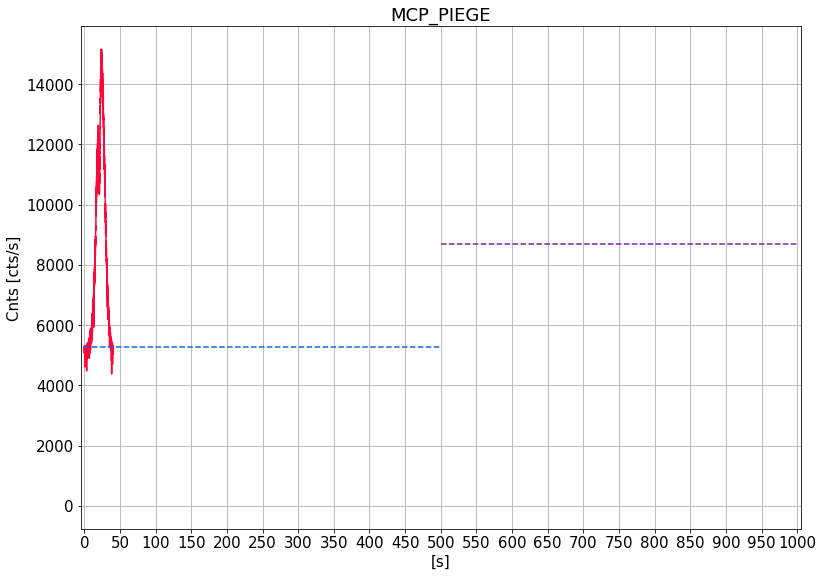

In [13]:
# one plot
fig = plt.figure('one_curve')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
title('MCP_PIEGE')
# ax2 = fig.add_subplot(212,sharex=ax1)

ax1.plot(TP[0], CH[0,0],color='xkcd:neon red',marker='',ms=2,ls='-',zorder=10)
ax1.hlines(min_tmp_1,0,500,linestyle='--',color='xkcd:azul',zorder=20)
ax1.hlines(min_tmp_2,500,1000,linestyles='--',color='xkcd:purple',zorder=20)
ax1.vlines(500,1,13,linestyle='--',color='xkcd:rouge',zorder=20)
ax1.set_xlabel('[s]')
ax1.set_ylabel('Cnts [cts/s]')

# leg = ax1.legend(title='scans 866')
# leg.get_title().set_fontsize(20)

ax1.set_xlim(-5,1005)
# ax1.set_ylim(3000,15500)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=50))
ax1.grid(zorder=5)

plt.tight_layout()

In [46]:
n = c /(866.21355*1e-9*346.0003*1e12)

# l866_1 = c/345.9993e12/n
# l866_2 = c/346.00085e12/n
l866_1 = 866.2173
l866_2 = 866.2103

print(l866_1*1e9,l866_2*1e9)

l_866 = around(linspace(l866_2*1e9,l866_1*1e9,len(TP[:,0])),5)
# l_866_bis = around(linspace(866,866.4,len(TIME[:,0])),5)
f_866 = around(c/(n*(l_866*1e-9))*1e-12,5)*1000
# f_866_bis = around(c/(n*(l_866_bis*1e-9))*1e-12,5)
center_f866=c/(l866_2+l866_1)/2
center_l866=(l866_2*1e9+l866_1*1e9)/2

866217300000.0 866210300000.0


In [44]:
fig = plt.figure('all_curves')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.hsv(x) for x in linspace(0,1,len(TP))]
cnt = 0
for k in range(4):
    ax1.plot(TP[k], CH[k,0],color=cl[k],marker='',ms=2,ls='-',label=k)
    cnt += 1
ax1.set_xlabel('[s]')
ax1.set_ylabel('Fluo [cts/5ms]')
leg = ax1.legend(title='scans 866')
leg.get_title().set_fontsize(20)

# ax1.set_xlim(-0.5,130)
# ax1.set_ylim(3000,15500)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()

In [63]:
(CH[k,0]-smooth_min)/(max(CH[k,0])-smooth_min)

array([0.02166264, 0.04283794, 0.03953537, ..., 0.02418814, 0.03059901,
       0.0203999 ])

In [89]:
346090000000000/1e12 , 2000000000/1e9

(346.09, 2.0)

In [106]:
from scipy.signal import hilbert, chirp



In [119]:
e = 1.602e-19
m = 40.078*1.66054e-27 # 40.078
m_amu = 40.078

analytic_signal = hilbert(CH[k,0])
amplitude_envelope = np.abs(analytic_signal)
A = amplitude_envelope

start_866 = l866_1*1e-9
end_866 = l866_2*1e-9

FREQ = zeros((len(TP),len(TP[0])))
tmp_FREQ = []
for k in range(len(TP)):
    tmp_FREQ.append( start_866 + TP[k] * (end_866 - start_866)/max(TP[k]) )
    for l in range(len(FREQ[k])):
#         print(l)
        FREQ[k][l] = c/tmp_FREQ[k][l]
    
fit_PM = zeros((4,3))
covar_PM = zeros((4,3,3))
fit_gauss = zeros((4,len(FREQ[0])))
T = zeros(4)
for k in [0,2,3]:
    print(k)
    fit_PM[k], covar_PM[k] = curve_fit(gaussian_fit,
                                       FREQ[k][:],(CH[k,0,:]-smooth_min)/(max(CH[k,0,:])-smooth_min),
                                      p0=[1,3.4609*1e14,2e9]) #p0=[1,3.461*1e14,2e9]  [1,346090000000000,2000000000]
    A = fit_PM[k,0]
#     A = 1
    mu = fit_PM[k,1]
    sig = fit_PM[k,2]
    fit_gauss[k] = gaussian_fit(FREQ[k],A,mu,sig)
    l0 = FREQ[0][len(FREQ[0])//2]
    FWHM = 2*sig*sqrt(2*log(2))
    T[k] = 300 * m_amu * ( FWHM * c / (2230*2*l0*sqrt(log(2))) )**2
    
T

0
2
3


array([621.44331625,   0.        , 322.09920616, 193.62476377])

In [15]:
coucou_tmp = CH[3]

In [29]:
fig = plt.figure('test_calque_diag443')
# clf()
ax1 = fig.add_subplot(111)
fig.set_size_inches(11.69,8.27)
plot()
ax1.set_xlim(0,1.4)
ax1.set_ylim(-0.6,0.6)
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.2))
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))

ax1.set_xlabel('q')
ax1.set_ylabel('a')
# fig.autofmt_xdate()
# ax1.grid(which='major', linestyle='-', linewidth='1', color='black')
# ax1.grid(which='minor', linestyle=':', linewidth='1', color='black')
grid()
# plt.tight_layout()

In [124]:
A = amplitude_envelope
A

array([4850.20942848, 4840.66925588, 4853.11715322, ..., 5040.36978101,
       4826.95232068, 4989.73506032])

In [129]:
CH[3] = coucou_tmp
CH[3] = savgol_filter(CH[3], 13, 6, deriv=0)


fig = plt.figure('all_curves_norm')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.hsv(x) for x in linspace(0,1,4)]
cnt = 0
for k in [3]:
    smooth_min = min(savgol_filter(CH[k,0], 51, 2, deriv=0))
    ax1.plot(FREQ[k]*1e-12, (CH[k,0]-smooth_min)/(max(CH[k,0])-smooth_min),color=cl[cnt],marker='',lw=0.5,ls='-',label='{:3.0f} K'.format(T[k]))
    ax1.plot(FREQ[k]*1e-12, (CH[k,0]-smooth_min)/(max(CH[k,0])-smooth_min),color=cl[cnt],color='blue')
    ax1.plot(FREQ[k]*1e-12, fit_gauss[k],color=cl[cnt])
#     ax1.plot(FREQ[k]*1e-12, (A-smooth_min)/(max(A)-smooth_min),color=cl[cnt])
    cnt += 1    
ax1.set_xlabel('Repumping laser frequency [THz]')
ax1.set_ylabel('Normalized fluorescence [cts/5ms]')
leg = ax1.legend(title='Températures')
leg.get_title().set_fontsize(20)

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.autofmt_xdate()
plt.xticks(rotation=15)
ax1.set_ylim(-0.1,1.1)
ax1.set_xlim(346.094,346.096)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()

SyntaxError: keyword argument repeated (<ipython-input-129-bff1f6e442d2>, line 16)

In [188]:
fig = figure('plot gaussienne')
clf()
ax1 = fig.add_subplot(111)
ax1.plot(FREQ[3]*1e-12, fit_gauss[2],color='xkcd:vermillion',marker='',ms=20,ls='-')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
fig.autofmt_xdate()

In [101]:
(CH[k,0]-smooth_min)/(max(CH[k,0])-smooth_min)

array([ 0.02368375, -0.04640513, -0.03216833, ...,  0.04175354,
        0.01711292,  0.06256118])

In [110]:
fit_gauss

array([2.88086902e-12, 3.01023588e-12, 3.14529603e-12, ...,
       4.61292514e-06, 4.47819626e-06, 4.34724206e-06])

In [11]:
my_label_l = ['129', '150', '135', '135', '135', '135', '142', '153', '140', '140', '140'] # longueurs d'onde
my_label_l = ['793.70' + s for s in my_label_l] # rajout du prefixe 793.70
my_label_l = array(my_label_l).astype(np.float) # conversion en float
my_label_P = [4, 3, 3, 7.8, 11.2, 6, 6, 6, 6, 7, 7]
print(my_label_l)

[793.70129 793.7015  793.70135 793.70135 793.70135 793.70135 793.70142
 793.70153 793.7014  793.7014  793.7014 ]


In [64]:
my_label_l

array([793.70129, 793.7015 , 793.70135, 793.70135, 793.70135, 793.70135,
       793.70142, 793.70153, 793.7014 , 793.7014 , 793.7014 ])

In [82]:
delta_866 = []
n_air = 1.000272
start_866 = 345.99910
end_866   = 346.0019
print('delta = ', (end_866-start_866)*1000, 'GHz')

ref_866 = 346.000235
ref_397 = 755.222766 # THz

for k,_ in enumerate(TP[:]):
    delta_866.append( (end_866 - start_866) * TP[k]/TP[k,-1] + start_866 - ref_866 )
print(delta_866)

delta_397 = ref_397/2*1e12 - c / ( my_label_l  * n_air * 1e-9 )
print(delta_397)

delta =  2.7999999999792635 GHz
[array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.0011294, ...,  0.0016622,  0.0016636,
        0.001665 ]), array([-0.0011322, -0.0011308, -0.001

In [101]:
# plot scan var l_397

fig = plt.figure('all_l_scans')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
title('Scans 866 en fct l_397')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.spring(x) for x in linspace(0,1,len(TP))]
cnt = 0
for k in [5,8,6,7]:
    ax1.plot(delta_866[k]*1000, CH[k,0,:]+200*cnt,
             color=cl[cnt], label = f'{delta_397[k]*1e-6:3.2f}'+ ' MHz',
             marker='',ms=2,ls='-')
    print(cnt)
    cnt += 1

ax1.set_xlabel(fr'$\Delta \nu$ [GHz] (ref. {ref_866:5.5f} THz / $\approx${c/(ref_866*1e12*n_air)*1e9:3.5f} nm )')
ax1.set_ylabel('Fluo [cts/5ms] (arbitraire)')
leg = ax1.legend(title='            $\Delta\lambda_{397}$' + f' \n (ref. {ref_397:5.5f} THz \n ref. {c/(ref_397*n_air)*1e-3:5.5f} nm)',
                loc=4)
leg.get_title().set_fontsize(20)

# ax1.set_xlim(-0.5,130)
# ax1.set_ylim(-0.5,7)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()

# savefig('all_MCP_040419789789789789.png')

0
1
2
3


In [45]:
pi*100e-6/150

2.0943951023931953e-06

NameError: name 'delta_866' is not defined

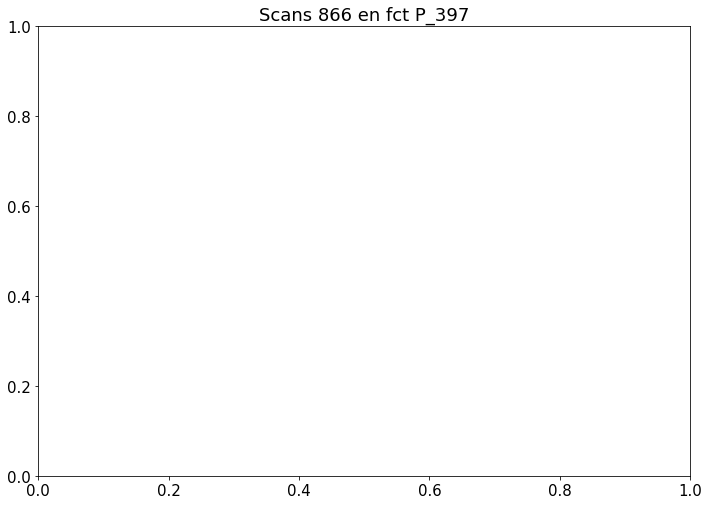

In [11]:
# plot scan var P_397

fig = plt.figure('all_P_scans')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
title('Scans 866 en fct P_397')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.spring(x) for x in linspace(0,1,6)]
cnt = 0
for k in [2,5,3,4]:
    ax1.plot(delta_866[k]*1000, CH[k,0,:],
             color=cl[cnt], label = f'{my_label_P[k]:04.1f}'+ ' mW',
             marker='',ms=2,ls='-')
    print(cnt)
    cnt += 1

ax1.set_xlabel(fr'$\Delta \nu$ [GHz] (ref. {ref_866:5.5f} THz / $\approx${c/(ref_866*1e12*n_air)*1e9:3.5f} nm )')
ax1.set_ylabel('Fluo [cts/5ms]')
leg = ax1.legend(title='$P_{397}$')
leg.get_title().set_fontsize(20)

# ax1.set_xlim(-0.5,130)
# ax1.set_ylim(-0.5,7)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()

# savefig('all_MCP_040419789789789789.png')

In [33]:
TP[k]

array([ 0.04,  0.06,  0.08, ..., 39.94, 39.96, 39.98])

In [40]:
start_866 = 866.2173
delta_866 = 866.2173 - 866.2103
FREQ = []
for k,_ in enumerate(TP):
    FREQ.append(start_866 + TP[k]*(delta_866)/max(TP[k]))
FREQ

[array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ]),
 array([866.217307  , 866.21731051, 866.21731401, ..., 866.224293  ,
        866.2242965 , 866.2243    ])]

In [22]:
my_label =['165/2.5/ON','165/2.5(0.4/0.5)/OFF', '99.5/1.8(0.5/0.6)/OFF',]

In [41]:
fig = plt.figure('all_P_scans')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)
title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.spring(x) for x in linspace(0,1,len(TP))]
cnt = 0
for k in [0,2,3]:
    ax1.plot(FREQ[k], CH[k,0],color=cl[k],marker='',ms=2,ls='-',label=my_label[cnt])
    cnt += 1
ax1.set_xlabel('[s]')
ax1.set_ylabel('Fluo [cts/5ms]')
leg = ax1.legend(title='scans 866')
leg.get_title().set_fontsize(20)

# ax1.set_xlim(-0.5,130)
ax1.set_ylim(3000,15500)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()